To get access to CLIMADA historical data, we need to set up the environment first. In VSCode, we need to install the Python and Jupyter extensions in the first place. Afterwards, in the left sidebar, select the “Extensions” symbol, enter “Python” in the search bar and click Install next to the “Python” extension. Repeat this process for “Jupyter”.

Open a Jupyter Notebook or create a new one. On the top right, click on Select Kernel, select Python Environments… and then choose the Python interpreter from the climada_env. 

In [2]:
from climada.hazard import TCTracks

In [ ]:
# We want to get Indian Ocean's historical data, which is North Indian Ocean (NI) + South Indian Ocean (SI)

# We get the historical NI data first.
tc_hist_ni = TCTracks.from_ibtracs_netcdf(basin='NI', year_range=(1980, 2024))

# We get the historical SI data next.
tc_hist_si = TCTracks.from_ibtracs_netcdf(basin='SI', year_range=(1980, 2024))

2025-03-04 12:49:11,145 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\beste\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2025-03-04 12:49:59,294 - climada.hazard.tc_tracks - WARNING - 64 storm events are discarded because no valid wind/pressure values have been found: 1980284N09092, 1980290N10088, 1980317N11075, 1980338N09085, 1980345N09092, ...
2025-03-04 12:49:59,301 - climada.hazard.tc_tracks - WARNING - 1 storm events are discarded because only one valid timestep has been found: 1995269N21088.


c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


2025-03-04 12:50:05,107 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\beste\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2025-03-04 12:51:46,147 - climada.hazard.tc_tracks - WARNING - 92 storm events are discarded because no valid wind/pressure values have been found: 1980015S18060, 1980032S14071, 1980056S15059, 1980068S13068, 1980075S11072, ...
2025-03-04 12:51:46,159 - climada.hazard.tc_tracks - WARNING - 12 storm events are discarded because only one valid timestep has been found: 1980002S15081, 1980005S11059, 1980009S14066, 1980010S20043, 1980010S22048, ...


c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


The best-track historical data from the International Best Track Archive for Climate Stewardship (IBTrACS) can easily be loaded into CLIMADA to study the historical records of TC events. The constructor from_ibtracs_netcdf() generates the Datasets for tracks selected by IBTrACS id, or by basin and year range. To achieve this, it downloads the first time the IBTrACS data v4 in netcdf format and stores it in ~/climada/data/. The tracks can be accessed later either using the attribute data or using get_track(), which allows to select tracks by its name or id.

In [3]:
# save the datasets
tc_hist_ni.write_hdf5('tc_hist_ni.hdf5')
tc_hist_si.write_hdf5('tc_hist_si.hdf5')

NameError: name 'tc_hist_ni' is not defined

In [ ]:
""" from climada.hazard import TropCyclone
from climada.hazard import Centroids
import numpy as np

# Manually merge by adding the events
tc_hist_merged = TCTracks()
tc_hist_merged.append(tc_hist_ni)
tc_hist_merged.append(tc_hist_si)

lats = np.arange(-40, 40, 1.0)  # Latitude range with 1-degree resolution
lons = np.arange(40, 120, 1.0)  # Longitude range with 1-degree resolution

centroids = Centroids.from_lat_lon(lats, lons)

# Convert to TropCyclone (which supports writing to HDF5)
tc_hazard = TropCyclone.from_tracks(tc_hist_merged, centroids)

# Save as HDF5
tc_hazard.write_hdf5("merged_tc_tracks_indian_ocean.hdf5") """

' from climada.hazard import TropCyclone\nfrom climada.hazard import Centroids\nimport numpy as np\n\n# Manually merge by adding the events\ntc_hist_merged = TCTracks()\ntc_hist_merged.append(tc_hist_ni)\ntc_hist_merged.append(tc_hist_si)\n\nlats = np.arange(-40, 40, 1.0)  # Latitude range with 1-degree resolution\nlons = np.arange(40, 120, 1.0)  # Longitude range with 1-degree resolution\n\ncentroids = Centroids.from_lat_lon(lats, lons)\n\n# Convert to TropCyclone (which supports writing to HDF5)\ntc_hazard = TropCyclone.from_tracks(tc_hist_merged, centroids)\n\n# Save as HDF5\ntc_hazard.write_hdf5("merged_tc_tracks_indian_ocean.hdf5") '

In [2]:
from climada.hazard import TCTracks
#load the datasets
tc_hist_ni = TCTracks.from_hdf5('tc_hist_ni.hdf5')

In [25]:
list = tc_hist_ni.subset({'category': 3}).data

#show only the storm_id
list

[<xarray.Dataset>
 Dimensions:                 (time: 70)
 Coordinates:
     lat                     (time) float32 9.1 9.2 9.168 9.0 ... 20.5 20.76 21.0
     lon                     (time) float32 111.4 110.6 109.7 ... 93.5 93.8 94.0
   * time                    (time) datetime64[ns] 1992-11-13T03:00:00 ... 199...
 Data variables:
     radius_max_wind         (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     radius_oci              (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     max_sustained_wind      (time) float32 19.5 36.17 36.17 ... 35.0 25.0 15.0
     central_pressure        (time) float32 1e+03 1e+03 ... 1.004e+03 1.008e+03
     environmental_pressure  (time) float64 1.005e+03 1.005e+03 ... 1.01e+03
     time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
     basin                   (time) <U2 'WP' 'WP' 'WP' 'WP' ... 'NI' 'NI' 'NI'
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     orig_event_flag:        

Number of tracks: 298


Text(0.5, 1.0, 'All historical tracks, NI')

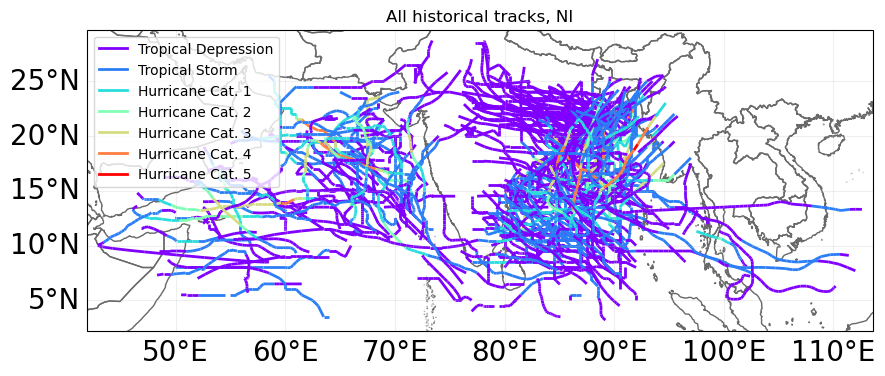

In [19]:
# years 1990 and 1999 in basin NI.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well

print('Number of tracks:', tc_hist_ni.size)
ax = tc_hist_ni.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('All historical tracks, NI') # set title

Number of tracks: 782


Text(0.5, 1.0, 'All historical tracks, SI')

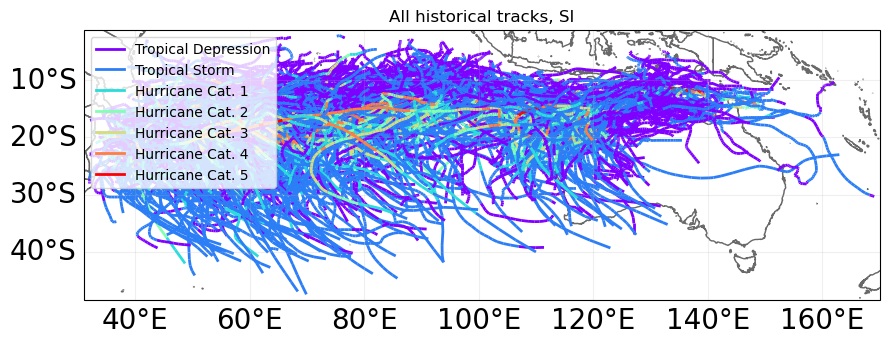

In [ ]:
# years 1990 and 1999 in basin SI.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well

print('Number of tracks:', tc_hist_si.size)
ax = tc_hist_si.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('All historical tracks, SI') # set title

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
india_plant = pd.read_excel('India-Coal-Plant-Tracker-January-2025.xlsx')
india_plant_operating = india_plant.loc[india_plant['Status']=='operating', :]
map_india = gpd.read_file('india-polygon.shp')
map_india.head()

<Axes: >

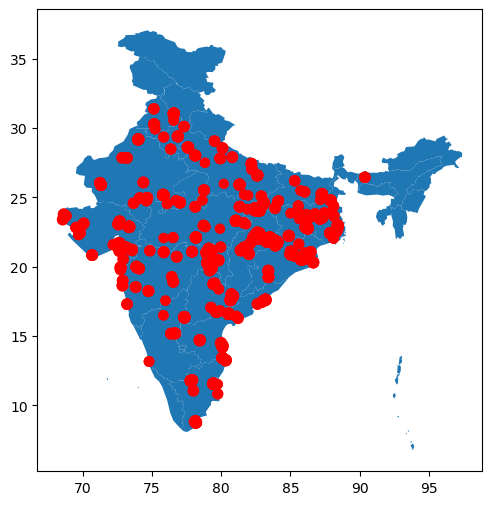

In [ ]:
geometry = [Point(xy) for xy in zip(india_plant_operating['Longitude'], india_plant_operating['Latitude'])]
gdf = GeoDataFrame(india_plant_operating, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=map_india.plot(figsize=(10, 6)), marker='o', color='red', markersize=india_plant_operating['Heat rate (Btu per kWh)']/200)

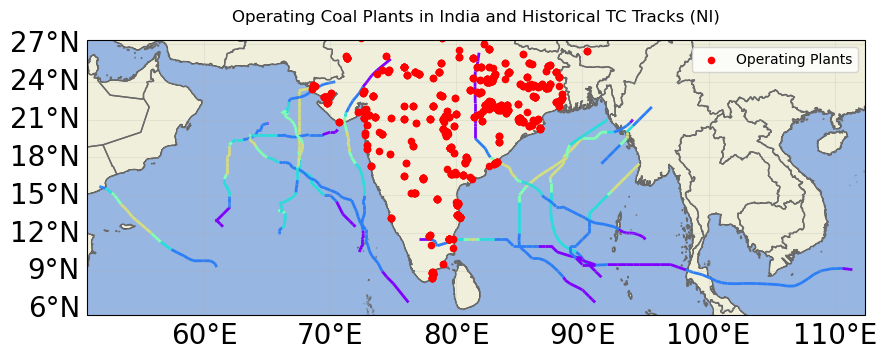

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

pp = pd.read_excel('cp.xlsx')

# Plot TC tracks for category
ax = tc_hist_ni.subset({"category": 3}).plot()

# Overlay coal power plants
ax.scatter(pp['Longitude'], pp['Latitude'], 
           color='red', label='Operating Plants', marker='o', s=20, transform=ccrs.PlateCarree(), zorder=2)

# Add map features like coastlines, borders, and lakes
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Add title and legend
ax.set_title("Operating Coal Plants in India and Historical TC Tracks (NI)")
ax.legend()

# Show the final plot
plt.show()


In [25]:
import h5py

with h5py.File('tc_hist_ni.hdf5', 'r') as f:
    print(list(f.keys()))  # List all available datasets in the file


['basin', 'category', 'central_pressure', 'central_pressure_unit', 'data_provider', 'environmental_pressure', 'id_no', 'lat', 'lon', 'max_sustained_wind', 'max_sustained_wind_unit', 'name', 'orig_event_flag', 'radius_max_wind', 'radius_oci', 'sid', 'step', 'storm', 'time', 'time_step']


In [ ]:
from climada.hazard import TCTracks

# Manually load the dataset
tc_synth = TCTracks()
tc_synth.from_hdf5('tropical_cyclone_10synth_tracks_150arcsec_rcp45_IND_2080.hdf5')

print(tc_synth)
# does not work

KeyError: 'storm'

2025-03-09 13:35:18,562 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\beste\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:
c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py:1511: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_one_interp_data" failed type inference due to: non-precise type pyobject
During: typing of argument at c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py (1545)

File "..\..\..\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py", line 1545:
    def _one_interp_data(track, time_step_h, land_geom=None):
        <source elided>

            time_step = pd.tseries.

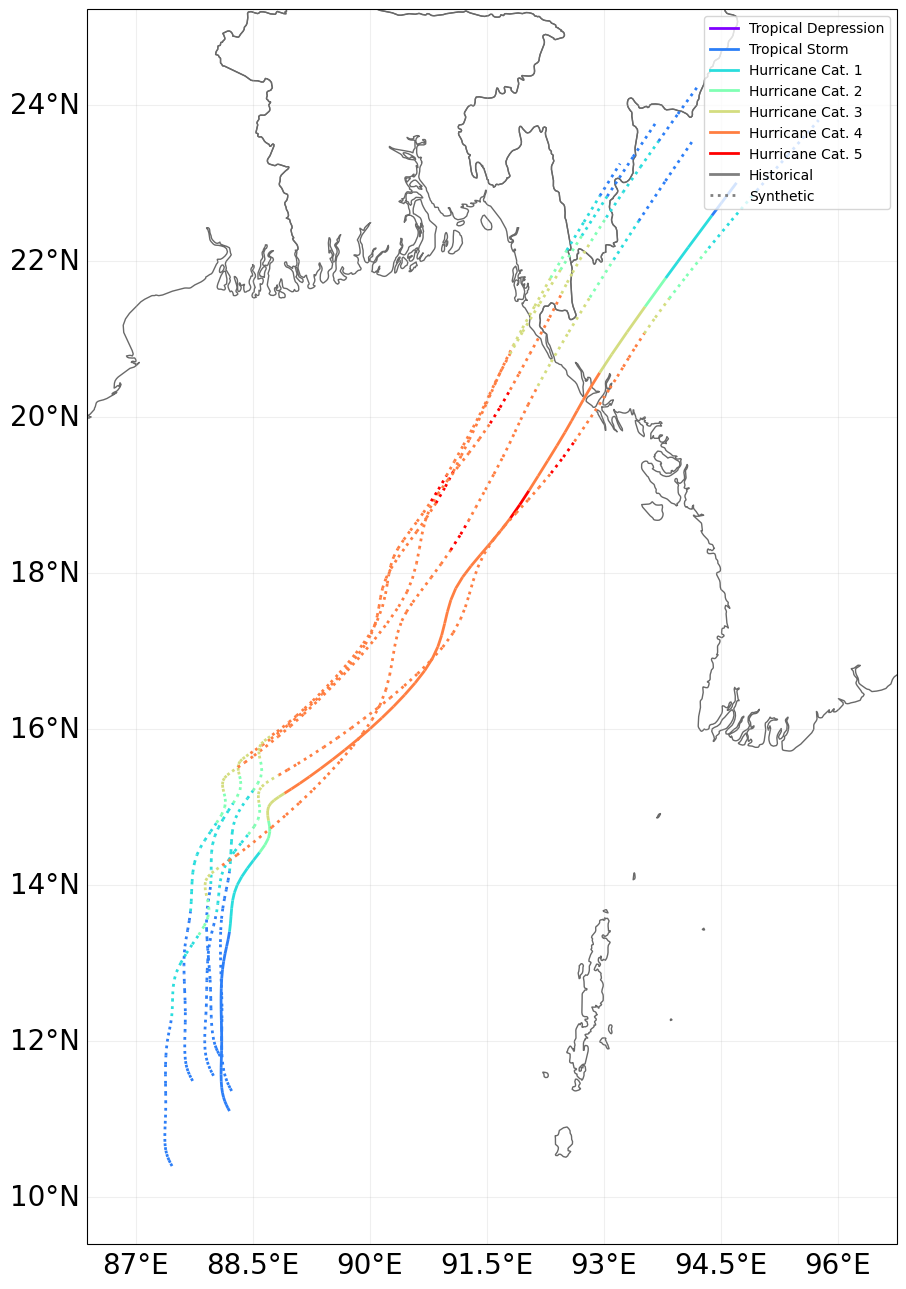

In [42]:
# Simulate tracks for storm Mocha
tr_mocha = TCTracks.from_ibtracs_netcdf(
    provider="usa", storm_id="2023131N11088"
)
tr_mocha.get_track("2023131N11088")

tr_mocha.equal_timestep()
tr_mocha.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_mocha.plot();

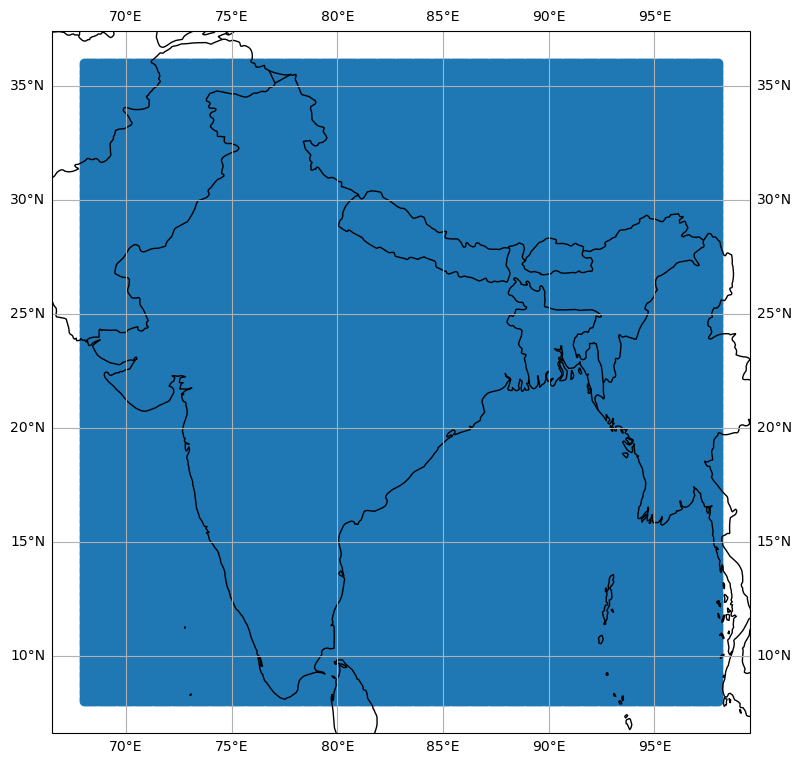

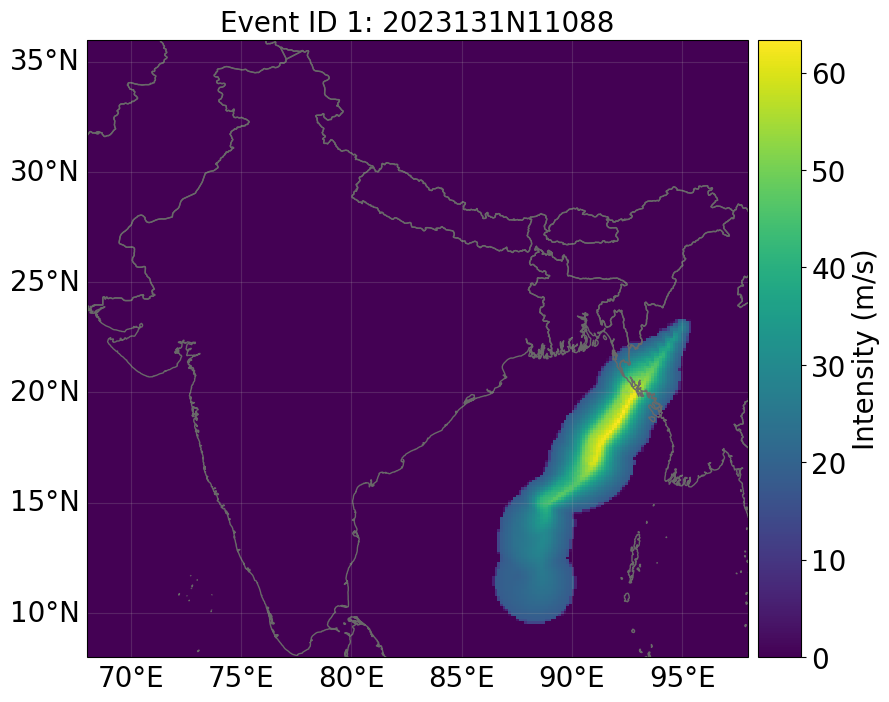

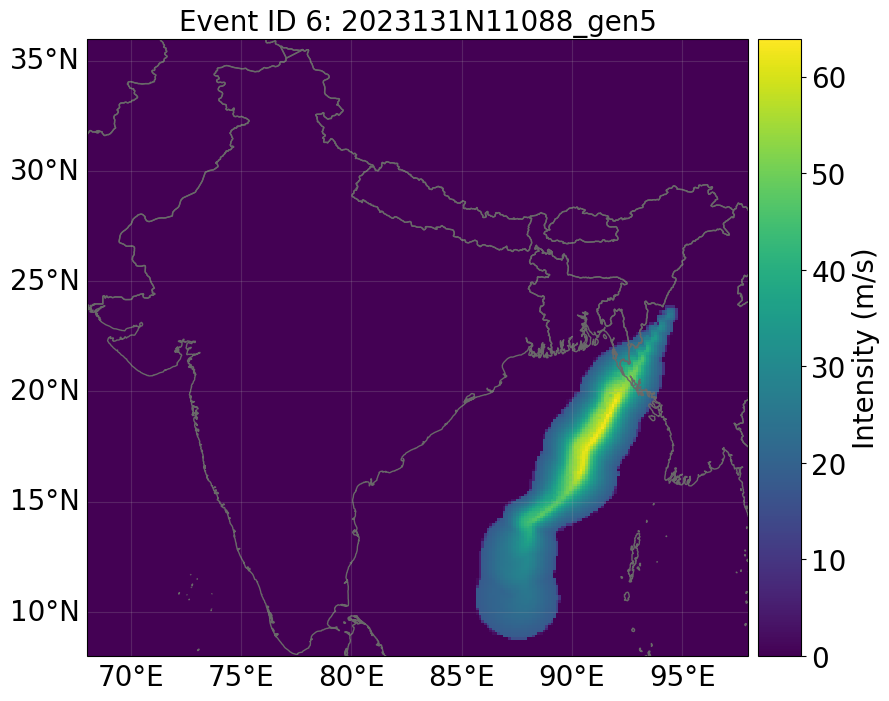

In [ ]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 8, 36, 68, 98
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.1)
cent.plot()

# construct tropical cyclones
tc_mocha = TropCyclone.from_tracks(tr_mocha, centroids=cent)

tc_mocha.check()
tc_mocha.plot_intensity("2023131N11088")

tc_mocha.plot_intensity("2023131N11088_gen5");  

In [ ]:
import numpy as np

# an Irma event-like in 2055 under RCP 4.5:
tc_mocha = TropCyclone.from_tracks(tr_mocha, centroids=cent)
tc_mocha_cc = tc_mocha.apply_climate_scenario_knu(scenario="4.5")
# love how the documentation code does not work
rel_freq_incr = np.round(
    (np.mean(tc_mocha_cc.frequency) - np.mean(tc_mocha.frequency))
    / np.mean(tc_mocha_cc.frequency)
    * 100,
    0,
)

print(
    f"\nA TC like Mocha would undergo a frequency increase of about {rel_freq_incr} % in 2055 under RCP 4.5"
)

TypeError: TropCyclone.apply_climate_scenario_knu() got an unexpected keyword argument 'scenario'